# Product Demand Forecasting using Time Series (ARIMA & Prophet)

This notebook demonstrates how to forecast weekly product demand using simulated SAP-like data. We'll use two popular time series models: ARIMA and Prophet.

## Step 1: Install Required Libraries

In [1]:
!pip install pandas numpy matplotlib statsmodels prophet

     ---------------------------------------- 13.3/13.3 MB 5.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 94.5/94.5 kB 5.3 MB/s eta 0:00:00
     -------------------------------------- 991.0/991.0 kB 5.7 MB/s eta 0:00:00


## Step 2: Simulate Demand Data

In [2]:

import pandas as pd
import numpy as np

# Simulate weekly demand data for 2 materials across 2 locations from 2021 to 2024
materials = ['MAT1001', 'MAT1002']
locations = ['LOC01', 'LOC02']
dates = pd.date_range('2021-01-01', '2024-12-31', freq='W')

data = []

for mat in materials:
    for loc in locations:
        demand = np.random.poisson(lam=50, size=len(dates))
        for i in range(len(dates)):
            data.append([mat, loc, dates[i], demand[i]])

df = pd.DataFrame(data, columns=["Material_ID", "Location", "Date", "Demand"])
df.to_csv("demand_data.csv", index=False)
df.head()


,Material_ID,Location,Date,Demand
0,MAT1001,LOC01,2021-01-03,47
1,MAT1001,LOC01,2021-01-10,53
2,MAT1001,LOC01,2021-01-17,37
3,MAT1001,LOC01,2021-01-24,45
4,MAT1001,LOC01,2021-01-31,54


## Step 3: Filter Data for a Single Material and Location

<AxesSubplot:title={'center':'Weekly Demand - MAT1001 @ LOC01'}, xlabel='Date'>

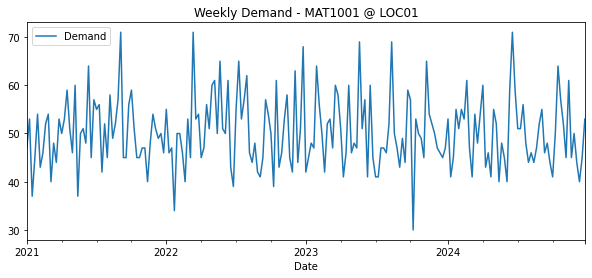

In [4]:

df = pd.read_csv("demand_data.csv", parse_dates=["Date"])
sample = df[(df['Material_ID'] == 'MAT1001') & (df['Location'] == 'LOC01')]
sample = sample[['Date', 'Demand']].set_index('Date').resample('W').sum()
sample.plot(title="Weekly Demand - MAT1001 @ LOC01", figsize=(10,4))


## Step 4: ARIMA Forecasting

<Figure size 720x288 with 0 Axes>

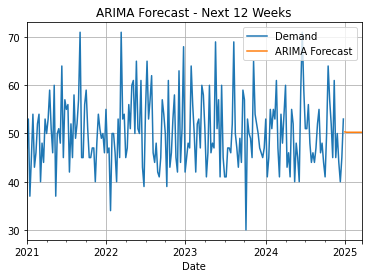

In [5]:

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

model = ARIMA(sample, order=(1,1,1))
model_fit = model.fit()
forecast_arima = model_fit.forecast(steps=12)

# Plot results
plt.figure(figsize=(10,4))
sample.plot(label='Historical', legend=True)
forecast_arima.plot(label='ARIMA Forecast', legend=True)
plt.title('ARIMA Forecast - Next 12 Weeks')
plt.grid(True)
plt.show()


## Step 5: Prophet Forecasting

17:37:36 - cmdstanpy - INFO - Chain [1] start processing
17:37:39 - cmdstanpy - INFO - Chain [1] done processing


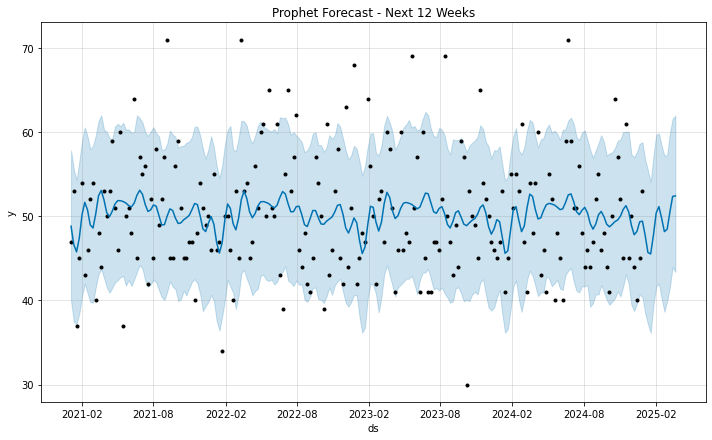

In [6]:

from prophet import Prophet

# Prepare data for Prophet
prophet_df = sample.reset_index().rename(columns={"Date": "ds", "Demand": "y"})
model = Prophet()
model.fit(prophet_df)

# Create future dates and forecast
future = model.make_future_dataframe(periods=12, freq='W')
forecast_prophet = model.predict(future)

# Plot forecast
fig = model.plot(forecast_prophet)
plt.title('Prophet Forecast - Next 12 Weeks')
plt.show()


## Done! 🎉

You have now forecasted weekly product demand using both ARIMA and Prophet on SAP-like simulated data.